## Loading Dependencies

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
import lightgbm as lgbm

## Data cleaning

### Loading dataset

In [45]:
df_train = pd.read_csv('df-train_set.csv')
df_test = pd.read_csv('df-test_set.csv')

In [46]:
df_train.head()

Province Container Size_Grade  Weight_Kg             Commodities  \
0               CAPE     EC120         1L       12.0      APPLE GRANNY SMITH   
1               CAPE     M4183         1L       18.3  APPLE GOLDEN DELICIOUS   
2            GAUTENG     AT200         1L       20.0       AVOCADO PINKERTON   
3          TRANSVAAL     BJ090         1L        9.0      TOMATOES-LONG LIFE   
4  WESTERN FREESTATE     PP100         1R       10.0   POTATO SIFRA (WASHED)   

         Date  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
0  2020-03-10      108.0       112.0       3236.0              29   
1  2020-09-09      150.0       170.0      51710.0             332   
2  2020-05-05       70.0        80.0       4860.0              66   
3  2020-01-20       60.0        60.0        600.0              10   
4  2020-07-14       40.0        45.0      41530.0             927   

   Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
0          348.0              0              9.30  
1         6075.6            822              8.51  
2         1320.0             50              3.68  
3           90.0              0              6.67  
4         9270.0            393              4.48

In [47]:
df_test.head()

Index              Province Container Size_Grade  Weight_Kg  \
0      1  W.CAPE-BERGRIVER ETC     EC120         1M       12.0   
1      2  W.CAPE-BERGRIVER ETC     M4183         1X       18.3   
2      3  W.CAPE-BERGRIVER ETC     EC120         1S       12.0   
3      4  W.CAPE-BERGRIVER ETC     M4183         1M       18.3   
4      5  W.CAPE-BERGRIVER ETC     M4183         1L       18.3   

              Commodities        Date  Low_Price  High_Price  Sales_Total  \
0  APPLE GOLDEN DELICIOUS  2020-07-09      128.0       136.0       5008.0   
1  APPLE GOLDEN DELICIOUS  2020-01-20      220.0       220.0       1760.0   
2  APPLE GOLDEN DELICIOUS  2020-08-19      120.0       120.0        720.0   
3  APPLE GOLDEN DELICIOUS  2020-05-06      160.0       160.0        160.0   
4  APPLE GOLDEN DELICIOUS  2020-05-04      140.0       160.0      14140.0   

   Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  
0              38          456.0              0  
1               8          146.4              2  
2               6           72.0             45  
3               1           18.3              8  
4             100         1830.0             19

### Data summary

In [48]:
df_train.shape

(64376, 13)

In [49]:
df_test.shape

(685, 13)

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Commodities     685 non-null    object 
 6   Date            685 non-null    object 
 7   Low_Price       685 non-null    float64
 8   High_Price      685 non-null    float64
 9   Sales_Total     685 non-null    float64
 10  Total_Qty_Sold  685 non-null    int64  
 11  Total_Kg_Sold   685 non-null    float64
 12  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 69.7+ KB


In [52]:
# Deleting index column in the test data
df_test = df_test.drop(['Index'],axis=1)

In [53]:
df_train.describe()

Weight_Kg     Low_Price    High_Price   Sales_Total  Total_Qty_Sold  \
count  64376.000000  64376.000000  64376.000000  6.437600e+04    64376.000000   
mean      12.781592     75.651938     89.607858  1.939501e+04      446.104402   
std       35.943052    159.508144    172.223177  4.442192e+04     1184.169758   
min        0.120000      1.000000      1.000000 -5.770000e+04     -595.000000   
25%        7.000000     30.000000     35.000000  1.154000e+03       20.000000   
50%       10.000000     46.000000     55.000000  5.400000e+03      107.000000   
75%       11.000000     80.000000    100.000000  1.877200e+04      390.000000   
max      500.000000   4400.000000   4400.000000  1.134701e+06    39453.000000   

       Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
count   64376.000000   64376.000000          64376.00  
mean     3336.641295     477.646328               NaN  
std      7682.295441    1453.892091               NaN  
min     -5040.000000    -512.000000              -inf  
25%       175.000000       0.000000              4.02  
50%       940.000000      76.000000              6.00  
75%      3250.000000     381.000000              8.67  
max    192230.000000   93193.000000               inf

In [54]:
df_test.describe()

Weight_Kg    Low_Price   High_Price    Sales_Total  Total_Qty_Sold  \
count  685.000000   685.000000   685.000000     685.000000      685.000000   
mean    34.142482   164.202891   195.590073   18788.111212      174.883212   
std     87.575995   355.167319   389.109476   33951.586813      299.351142   
min      3.000000    10.000000    10.000000      10.000000        1.000000   
25%      9.000000    50.000000    64.000000    1300.000000       13.000000   
50%     12.000000    80.000000   112.000000    5520.000000       62.000000   
75%     18.300000   128.000000   160.000000   21176.000000      200.000000   
max    400.000000  2400.000000  2400.000000  308010.000000     2774.000000   

       Total_Kg_Sold  Stock_On_Hand  
count     685.000000     685.000000  
mean     2725.402336     439.245255  
std      5059.123311     715.985761  
min         6.300000       0.000000  
25%       204.000000      20.000000  
50%       860.100000     153.000000  
75%      3033.000000     516.000000  
max     47200.000000    6827.000000

In [55]:
df_train.nunique()

Province               22
Container             153
Size_Grade             47
Weight_Kg              50
Commodities           270
Date                  147
Low_Price             320
High_Price            277
Sales_Total         18356
Total_Qty_Sold       3766
Total_Kg_Sold        8315
Stock_On_Hand        4192
avg_price_per_kg     3326
dtype: int64

In [56]:
df_test.nunique()

Province            7
Container          11
Size_Grade         10
Weight_Kg           9
Commodities         1
Date              144
Low_Price          70
High_Price         65
Sales_Total       569
Total_Qty_Sold    285
Total_Kg_Sold     426
Stock_On_Hand     393
dtype: int64

In [57]:
# Deleting other commodities
df_train = df_train[df_train['Commodities']=='APPLE GOLDEN DELICIOUS']

In [58]:
df_train.describe()

Weight_Kg    Low_Price   High_Price    Sales_Total  Total_Qty_Sold  \
count  1952.000000  1952.000000  1952.000000    1952.000000     1952.000000   
mean     40.460912   174.307377   215.648053   20053.533811      174.510758   
std      99.655169   373.553578   433.546159   39005.069445      308.810797   
min       3.000000     2.000000     5.000000       5.000000        1.000000   
25%       9.000000    50.000000    60.000000    1325.000000       12.000000   
50%      12.000000    80.000000   108.000000    5495.000000       64.000000   
75%      18.300000   127.250000   160.000000   21082.500000      200.000000   
max     400.000000  2300.000000  3300.000000  369464.000000     4237.000000   

       Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
count    1952.000000    1952.000000       1952.000000  
mean     2960.176332     408.393955          6.778893  
std      6097.416527     724.450582          2.248744  
min         3.000000       0.000000          0.250000  
25%       219.600000       9.000000          5.460000  
50%       853.500000     126.500000          6.670000  
75%      3093.525000     468.000000          8.280000  
max     74000.000000    6400.000000         21.240000

### Handling missing data

In [59]:
df_train.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [60]:
df_test.isnull().sum()

Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

### Handling outliers

In [61]:
#Calculating the percentiles
q1 = df_train['avg_price_per_kg'].quantile(0.25)
q3 = df_train['avg_price_per_kg'].quantile(0.75)
IQR = q3 - q1

In [62]:
#Setting the upper and the lower limits for our train data and removing outliers
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
df_new = df_train
df_train = df_train[(df_train['avg_price_per_kg']>=q1) | (df_train['avg_price_per_kg']<=q3)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


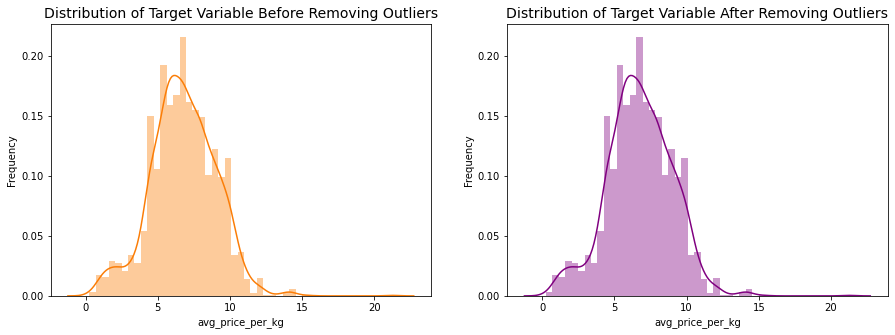

In [68]:
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))

# Before removing outliers
sns.distplot(df_new['avg_price_per_kg'],ax=axis[0],color='#fb7d07')
axis[0].set_title('Distribution of Target Variable Before Removing Outliers',fontsize=14)
axis[0].set_xlabel('avg_price_per_kg')
axis[0].set_ylabel('Frequency')

# After removing outliers
sns.distplot(df_train['avg_price_per_kg'],ax=axis[1],color='purple')
axis[1].set_title('Distribution of Target Variable After Removing Outliers',fontsize=14)
axis[1].set_xlabel('avg_price_per_kg')
axis[1].set_ylabel('Frequency')

plt.show()

## Exploratory Data Analysis

### Visualizing univariate data

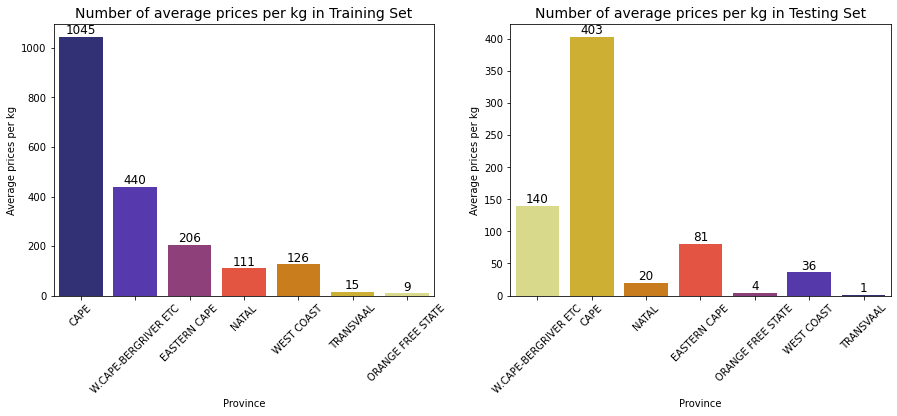

In [76]:
# Number of Orders Per Platform Type
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))

# Training set
ax1_PT = sns.countplot(x='Province',data=df_train,palette='CMRmap',ax=axis[0])
axis[0].set_title('Number of average prices per kg in Training Set',fontsize=14)
axis[0].set_xlabel('Province')
axis[0].set_xticklabels(axis[0].get_xticklabels(),rotation = 45)
axis[0].set_ylabel('Average prices per kg')
for p in ax1_PT.patches:
    ax1_PT.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')
# Testing set
ax2_PT = sns.countplot(x='Province',data=df_test,palette='CMRmap_r',ax=axis[1])
axis[1].set_title('Number of average prices per kg in Testing Set',fontsize=14)
axis[1].set_xlabel('Province')
axis[1].set_xticklabels(axis[1].get_xticklabels(),rotation = 45)
axis[1].set_ylabel('Average prices per kg')
for p in ax2_PT.patches:
    ax2_PT.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')

plt.show()

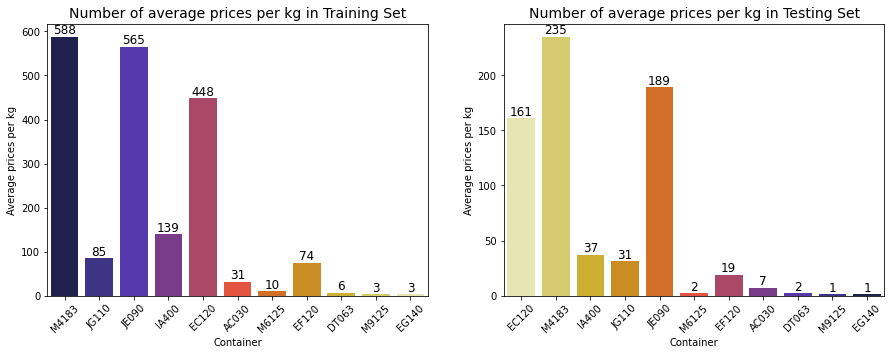

In [81]:
# Number of Orders Per Platform Type
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))

# Training set
ax1_PT = sns.countplot(x='Container',data=df_train,palette='CMRmap',ax=axis[0])
axis[0].set_title('Number of average prices per kg in Training Set',fontsize=14)
axis[0].set_xlabel('Container')
axis[0].set_xticklabels(axis[0].get_xticklabels(),rotation = 45)
axis[0].set_ylabel('Average prices per kg')
for p in ax1_PT.patches:
    ax1_PT.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')
# Testing set
ax2_PT = sns.countplot(x='Container',data=df_test,palette='CMRmap_r',ax=axis[1])
axis[1].set_title('Number of average prices per kg in Testing Set',fontsize=14)
axis[1].set_xlabel('Container')
axis[1].set_xticklabels(axis[1].get_xticklabels(),rotation = 45)
axis[1].set_ylabel('Average prices per kg')
for p in ax2_PT.patches:
    ax2_PT.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')

plt.show()

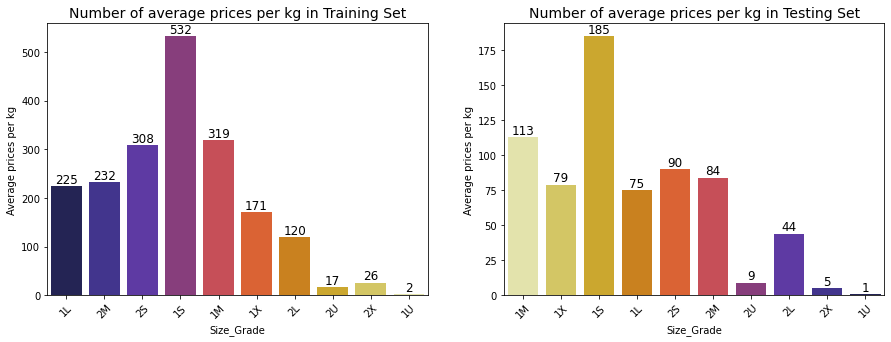

In [82]:
# Number of Orders Per Platform Type
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))

# Training set
ax1_PT = sns.countplot(x='Size_Grade',data=df_train,palette='CMRmap',ax=axis[0])
axis[0].set_title('Number of average prices per kg in Training Set',fontsize=14)
axis[0].set_xlabel('Size_Grade')
axis[0].set_xticklabels(axis[0].get_xticklabels(),rotation = 45)
axis[0].set_ylabel('Average prices per kg')
for p in ax1_PT.patches:
    ax1_PT.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')
# Testing set
ax2_PT = sns.countplot(x='Size_Grade',data=df_test,palette='CMRmap_r',ax=axis[1])
axis[1].set_title('Number of average prices per kg in Testing Set',fontsize=14)
axis[1].set_xlabel('Size_Grade')
axis[1].set_xticklabels(axis[1].get_xticklabels(),rotation = 45)
axis[1].set_ylabel('Average prices per kg')
for p in ax2_PT.patches:
    ax2_PT.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')

plt.show()

## Data preprocessing

### Dummy variables

In [88]:
## Defining X and y
X_train = df_train.drop('avg_price_per_kg',axis=1)
y = df_train['avg_price_per_kg']
X_test = df_test

In [93]:
X_train

Weight_Kg  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
1           18.3      150.0       170.0      51710.0             332   
7           11.0       50.0        50.0      16000.0             320   
24           9.0       55.0        55.0        990.0              18   
40          18.3       80.0       120.0      32020.0             388   
69         400.0     1800.0      1800.0       1800.0               1   
...          ...        ...         ...          ...             ...   
64276       12.0       96.0        96.0       1920.0              20   
64291       18.3      130.0       130.0       7280.0              56   
64297        9.0       50.0        60.0       4540.0              89   
64304       11.0       30.0        40.0       2140.0              70   
64310       12.0       88.0       104.0       9960.0             109   

       Total_Kg_Sold  Stock_On_Hand  Province_CAPE  Province_EASTERN CAPE  \
1             6075.6            822              1                      0   
7             3520.0              0              1                      0   
24             162.0           1506              0                      0   
40            7100.4            443              1                      0   
69             400.0              2              0                      1   
...              ...            ...            ...                    ...   
64276          240.0             53              0                      0   
64291         1024.8             74              0                      0   
64297          801.0            793              1                      0   
64304          770.0              0              1                      0   
64310         1308.0             67              0                      0   

       Province_NATAL  ...  Date_2020-09-07  Date_2020-09-09  Date_2020-09-16  \
1                   0  ...                0                1                0   
7                   0  ...                0                0                0   
24                  0  ...                0                0                0   
40                  0  ...                0                0                0   
69                  0  ...                0                0                0   
...               ...  ...              ...              ...              ...   
64276               1  ...                0                0                0   
64291               0  ...                0                0                0   
64297               0  ...                0                0                0   
64304               0  ...                0                0                0   
64310               0  ...                0                0                0   

       Date_2020-09-17  Date_2020-09-19  Date_2020-09-21  Date_2020-09-23  \
1                    0                0                0                0   
7                    0                0                0                0   
24                   0                0                0                0   
40                   0                0                0                0   
69                   0                0                0                0   
...                ...              ...              ...              ...   
64276                0                0                0                0   
64291                0                0                0                0   
64297                0                0                0                0   
64304                0                0                0                0   
64310                0                0                0                0   

       Date_2020-09-28  Date_2020-10-01  Date_2020-10-03  
1                    0                0                0  
7                    0                0                0  
24                   0                0                0  
40                   0                0                0  
69                   1  

In [94]:
y

1        8.51
7        4.55
24       6.11
40       4.51
69       4.50
         ... 
64276    8.00
64291    7.10
64297    5.67
64304    2.78
64310    7.61
Name: avg_price_per_kg, Length: 1952, dtype: float64

In [95]:
X_test

Weight_Kg  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
0         12.0      128.0       136.0       5008.0              38   
1         18.3      220.0       220.0       1760.0               8   
2         12.0      120.0       120.0        720.0               6   
3         18.3      160.0       160.0        160.0               1   
4         18.3      140.0       160.0      14140.0             100   
..         ...        ...         ...          ...             ...   
680        9.0       30.0        30.0       1320.0              44   
681       12.0       50.0       132.0       6290.0              52   
682        9.0       55.0        55.0        220.0               4   
683       18.3      120.0       150.0      27840.0             202   
684       18.3      120.0       160.0      71010.0             491   

     Total_Kg_Sold  Stock_On_Hand  Province_CAPE  Province_EASTERN CAPE  \
0            456.0              0              0                      0   
1            146.4              2              0                      0   
2             72.0             45              0                      0   
3             18.3              8              0                      0   
4           1830.0             19              0                      0   
..             ...            ...            ...                    ...   
680          396.0            856              0                      0   
681          624.0            785              1                      0   
682           36.0            170              0                      0   
683         3696.6              0              1                      0   
684         8985.3              0              1                      0   

     Province_NATAL  ...  Date_2020-09-03  Date_2020-09-07  Date_2020-09-09  \
0                 0  ...                0                0                0   
1                 0  ...                0                0                0   
2                 0  ...                0                0                0   
3                 0  ...                0                0                0   
4                 0  ...                0                0                0   
..              ...  ...              ...              ...              ...   
680               0  ...                0                0                0   
681               0  ...                0                0                0   
682               0  ...                0                0                0   
683               0  ...                0                0                0   
684               0  ...                0                0                0   

     Date_2020-09-17  Date_2020-09-19  Date_2020-09-21  Date_2020-09-23  \
0                  0                0                0                0   
1                  0                0                0                0   
2                  0                0                0                0   
3                  0                0                0                0   
4                  0                0                0                0   
..               ...              ...              ...              ...   
680                0                0                0                0   
681                0                0                0                0   
682                0                0                0                0   
683                0                0                0                0   
684                0                0                0                0   

     Date_2020-09-28  Date_2020-10-01  Date_2020-10-03  
0                  0                0                0  
1                  0                0                0  
2                  0                0                0  
3                  0                0                0  
4                  0                0                0  
..               ...              ...              ...  
680           

In [100]:
# converting categorical data to numerics
X_trans = pd.get_dummies(X_train)
X_tests = pd.get_dummies(X_test)

### Splitting data into train and validation set

In [101]:
X_train, X_val, y_train, y_val = train_test_split(X_trans, y, test_size=0.2, random_state=0)

### Feature scaling

In [111]:
# Make new copies for scaling
scaler = StandardScaler()
X_train_scaled = X_train
X_val_scaled = X_val
X_test_scaled = X_tests

# Apply scaler to numeric features
X_train_scaled.iloc[:,:7] = scaler.fit_transform(X_train_scaled.iloc[:,:7])
X_val_scaled.iloc[:,:7] = scaler.transform(X_val_scaled.iloc[:,:7])
X_test_scaled.iloc[:,:7] = scaler.transform(X_test_scaled.iloc[:,:7])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


## Data modeling

In [123]:
# general function to test all the models
def get_RMSE_score(ml,X_train_scaled,y_train,X_val_scaled,y_test):
    ml.fit(X_train, y_train)
    y_pred_ml = ml.predict(X_val)
    ml_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred_ml))
    ml_r2 = metrics.r2_score(y_val, y_pred_ml)
    return print(ml_rmse)

### Decision tree

In [124]:
get_RMSE_score(DecisionTreeRegressor(max_depth=10, random_state=42),X_train_scaled,y_train,X_val_scaled,y_val)

0.7158910066957646


### Support vector regression

In [131]:
get_RMSE_score(SVR(),X_train_scaled,y_train,X_val_scaled,y_val)

0.9894815212290414


### CatBoost

In [129]:
get_RMSE_score(CatBoostRegressor(iterations=700,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 0,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100),X_train_scaled,y_train,X_val_scaled,y_val)

0:	learn: 2.2158701	total: 270ms	remaining: 3m 8s
75:	learn: 1.0259991	total: 4.29s	remaining: 35.2s
150:	learn: 0.6804419	total: 8.31s	remaining: 30.2s
225:	learn: 0.5397010	total: 12.4s	remaining: 26s
300:	learn: 0.4624649	total: 16.7s	remaining: 22.1s
375:	learn: 0.4075806	total: 21.7s	remaining: 18.7s
450:	learn: 0.3698013	total: 26.9s	remaining: 14.8s
525:	learn: 0.3390313	total: 31.6s	remaining: 10.4s
600:	learn: 0.3093073	total: 36.5s	remaining: 6.01s
675:	learn: 0.2851061	total: 40.9s	remaining: 1.45s
699:	learn: 0.2780006	total: 42.4s	remaining: 0us
0.57652450381647


### XGBoost

In [138]:
get_RMSE_score(xgb.XGBRegressor(),X_train_scaled,y_train,X_val_scaled,y_val)

0.526316995996218


### Lightgbm

In [139]:
get_RMSE_score(lgbm.LGBMRegressor(learning_rate=0.1, min_data_in_leaf=250, num_leaves=50, objective='regression'),X_train_scaled,y_train,X_val_scaled,y_val)

[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250
1.0910911098737677


### RandomForestRegressor

In [147]:
get_RMSE_score(RandomForestRegressor(),X_train_scaled,y_train,X_val_scaled,y_val)

0.5701558139437963


In [151]:
lgbm_model = lgbm.LGBMRegressor(learning_rate=0.1, min_data_in_leaf=250, num_leaves=50, objective='regression')
lgbm_model.fit(X_train,y_train)
y_pred = lgbm_model.predict(X_val)
lgbm_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred))
lgbm_r2 = metrics.r2_score(y_val, y_pred)

lgbm_model.predict(X_test_scaled)

[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250


ValueError: Number of features of the model must match the input. Model n_features_ is 183 and input n_features is 180 